In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import os
import cv2

path = 'D:\\Daria\\uni\\MS'

In [3]:
folders = os.listdir(path)

In [13]:
from PIL import Image

In [59]:
folders = os.listdir(path)
for folder in folders:
    files = os.listdir(os.path.join(path, folder, 'png'))
    for file in files:
        if file[-6:] == '09.png':
            im = cv2.imread(os.path.join(path,folder,'png',file))
            row, col = im.shape[:2]
            #bsize = 32
            #bim = cv2.copyMakeBorder(im, top = 0, bottom = 0, left = bsize, right = bsize, 
            #                         borderType = cv2.BORDER_CONSTANT, value = [0,0,0])
            plt.imsave('D:\\Daria\\uni\\mri\\dataset\\heads\\' + folder + '0009.tif', im, cmap='gray')
    print(folder)

01_1
01_10
01_100
01_101
01_102
01_104
01_106
01_107
01_108
01_11
01_110
01_112
01_114
01_117
01_120
01_124
01_127
01_129
01_132
01_134
01_138
01_140
01_142
01_143
01_144
01_150
01_157
01_158
01_163
01_165
01_168
01_170
01_173
01_176
01_179
01_184
01_186
01_19
01_191
01_196
01_198
01_199
01_2
01_20
01_203
01_204
01_209
01_213
01_222
01_223
01_228
01_230
01_232
01_235
01_237
01_242
01_246
01_251
01_252
01_253
01_256
01_258
01_259
01_260
01_262
01_265
01_268
01_27
01_271
01_275
01_278
01_279
01_285
01_289
01_290
01_292
01_293
01_294
01_297
01_3
01_301
01_304
01_307
01_309
01_310
01_316
01_32
01_320
01_327
01_330
01_332
01_34
01_340
01_341
01_342
01_343
01_344
01_345
01_349
01_355
01_356
01_358
01_359
01_363
01_367
01_369
01_370
01_373
01_376
01_378
01_379
01_381
01_387
01_39
01_392
01_393
01_394
01_396
01_397
01_400
01_403
01_404
01_409
01_412
01_414
01_416
01_424
01_425
01_426
01_43
01_432
01_434
01_438
01_441
01_444
01_447
01_449
01_453
01_455
01_463
01_467
01_47
01_471
01_474
01_475
0

In [6]:
from functions import *

def strip_one(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask_0 = gray < 140
    exp = applymask(img, mask_0)
    gray = cv2.cvtColor(exp, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
    brain_mask = remgar(thresh)
    brain_mask = np.uint8(brain_mask)
    clean = tophat(brain_mask, kernel(10))
    ker = np.ones((3,3), np.uint8) 
    erosion = cv2.erode(clean, ker, iterations=1) 
    closing_2 = close(erosion, 3)
    closing_2 = np.uint8(closing_2)
    mask_2 = floodfill(closing_2)
    exp = remgar(mask_2)
    exp = close(exp, 10)
    exp = floodfill(exp)
    segm = applymask(img, exp)
    return segm, exp

In [60]:
path = 'D:\\Daria\\uni\\mri\\dataset\\heads'
slices = []
files = os.listdir(path)
for file in files:
    im = cv2.imread(os.path.join(path,file))
    res, _ = strip_one(im)
    plt.imsave('D:\\Daria\\uni\\mri\\dataset\\brains' + file, res, cmap='gray')

In [78]:
folders = os.listdir('D:\\Daria\\uni\\MS')
for folder in folders:
    files = os.listdir(os.path.join(path, folder,'png'))
    for file in files:
        if file[-6:-4] == '09':
            im = cv2.imread(os.path.join(path,folder, 'png',file))
            res, _ = strip_one(im)
            brains.append(res)
    print(folder)

01_1
01_10
01_100
01_101
01_102
01_104
01_106
01_107
01_108
01_11
01_110
01_112
01_114
01_117
01_120
01_124
01_127
01_129
01_132
01_134
01_138
01_140
01_142
01_143
01_144
01_150
01_157
01_158
01_163
01_165
01_168
01_170
01_173
01_176
01_179
01_184
01_186
01_19
01_191
01_196
01_198
01_199
01_2
01_20
01_203
01_204
01_209
01_213
01_222
01_223
01_228
01_230
01_232
01_235
01_237
01_242
01_246
01_251
01_252
01_253
01_256
01_258
01_259
01_260
01_262
01_265
01_268
01_27
01_271
01_275
01_278
01_279
01_285
01_289
01_290
01_292
01_293
01_294
01_297
01_3
01_301
01_304
01_307
01_309
01_310
01_316
01_32
01_320
01_327
01_330
01_332
01_34
01_340
01_341
01_342
01_343
01_344
01_345
01_349
01_355
01_356
01_358
01_359
01_363
01_367
01_369
01_370
01_373
01_376
01_378
01_379
01_381
01_387
01_39
01_392
01_393
01_394
01_396
01_397
01_400
01_403
01_404
01_409
01_412
01_414
01_416
01_424
01_425
01_426
01_43
01_432
01_434
01_438
01_441
01_444
01_447
01_449
01_453
01_455
01_463
01_467
01_47
01_471
01_474
01_475
0

In [8]:
import PIL

In [58]:
masks = []

In [62]:
folders = os.listdir(path)
for folder in folders:
    files = os.listdir(os.path.join(path, folder,'tif'))
    for file in files:
        if file[-6:-4] == '09':
            masks.append(np.array(PIL.Image.open(os.path.join(path,folder,'tif',file))))
    print(folder)

01_1
01_10
01_100
01_101
01_102
01_104
01_106
01_107
01_108
01_11
01_110
01_112
01_114
01_117
01_120
01_124
01_127
01_129
01_132
01_134
01_138
01_140
01_142
01_143
01_144
01_150
01_157
01_158
01_163
01_165
01_168
01_170
01_173
01_176
01_179
01_184
01_186
01_19
01_191
01_196
01_198
01_199
01_2
01_20
01_203
01_204
01_209
01_213
01_222
01_223
01_228
01_230
01_232
01_235
01_237
01_242
01_246
01_251
01_252
01_253
01_256
01_258
01_259
01_260
01_262
01_265
01_268
01_27
01_271
01_275
01_278
01_279
01_285
01_289
01_290
01_292
01_293
01_294
01_297
01_3
01_301
01_304
01_307
01_309
01_310
01_316
01_32
01_320
01_327
01_330
01_332
01_34
01_340
01_341
01_342
01_343
01_344
01_345
01_349
01_355
01_356
01_358
01_359
01_363
01_367
01_369
01_370
01_373
01_376
01_378
01_379
01_381
01_387
01_39
01_392
01_393
01_394
01_396
01_397
01_400
01_403
01_404
01_409
01_412
01_414
01_416
01_424
01_425
01_426
01_43
01_432
01_434
01_438
01_441
01_444
01_447
01_449
01_453
01_455
01_463
01_467
01_47
01_471
01_474
01_475
0

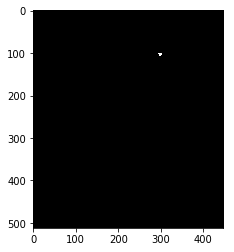

In [72]:
view(masks[0])

In [70]:
img = cv2.imread('D:\\Daria\\uni\\mri\\dataset\\brains\\brains01_10009.tif')

In [73]:
brains = []

In [1]:
n = 7# Number of levels of quantization
indices = np.arange(0,256)   # List of all colors 
divider = np.linspace(0,255,n+1)[1] # we get a divider
quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors
color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..
palette = quantiz[color_levels] # Creating the palette
im2 = palette[brains[9]]  # Applying palette on image
im2 = cv2.convertScaleAbs(im2) # Converting image back to uint8
view(brains[10])

NameError: name 'np' is not defined

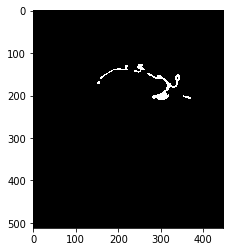

In [137]:
view(masks[9])

In [5]:
head = cv2.imread(path + '\\01_43\\png\\IM000011.png')

In [7]:
from functions import *

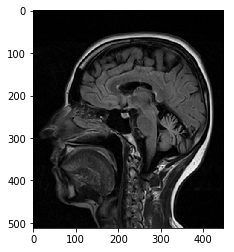

In [8]:
view(head)

In [17]:
mask = np.array(PIL.Image.open(path + '\\01_43\\tif\\01_430011.tif'))

In [15]:
import PIL

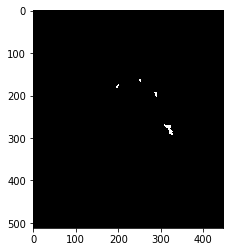

In [18]:
view(mask)